# Breast Cancer

### Import Dependencies

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler, MinMaxScaler


## Data Import

In [5]:
# Load dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)

# Add target variable
df['target'] = data.target

## Data Cleansing

In [7]:
# Check for missing values
print(df.isnull().sum())  # No missing values in this dataset

# Check for duplicate values
print(f"Duplicate rows: {df.duplicated().sum()}")  # Should be 0

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64
Duplicate rows: 0


## Data Normailisation

In [9]:
# Data Normalization using StandardScaler
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df.iloc[:, :-1]), columns=data.feature_names)
df_scaled['target'] = df['target']


## Different Scaling Techniques 

In [11]:
# from sklearn.preprocessing import MinMaxScaler

# # Apply MinMax Scaling
# scaler = MinMaxScaler()
# X_scaled = scaler.fit_transform(X)

## Data Visualisation

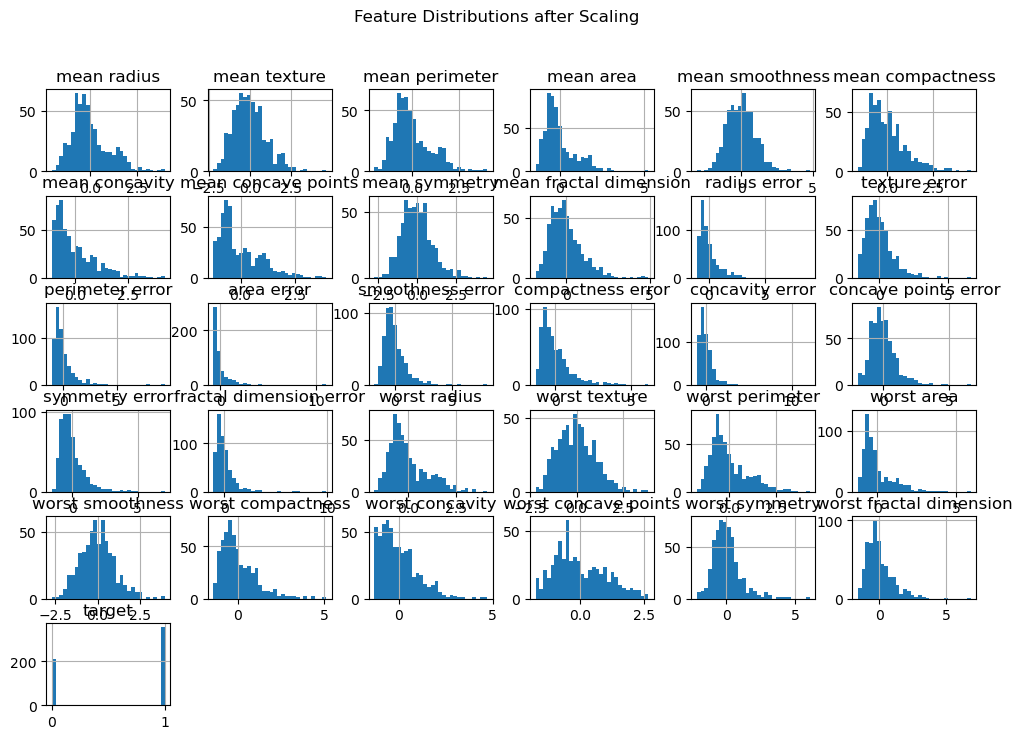

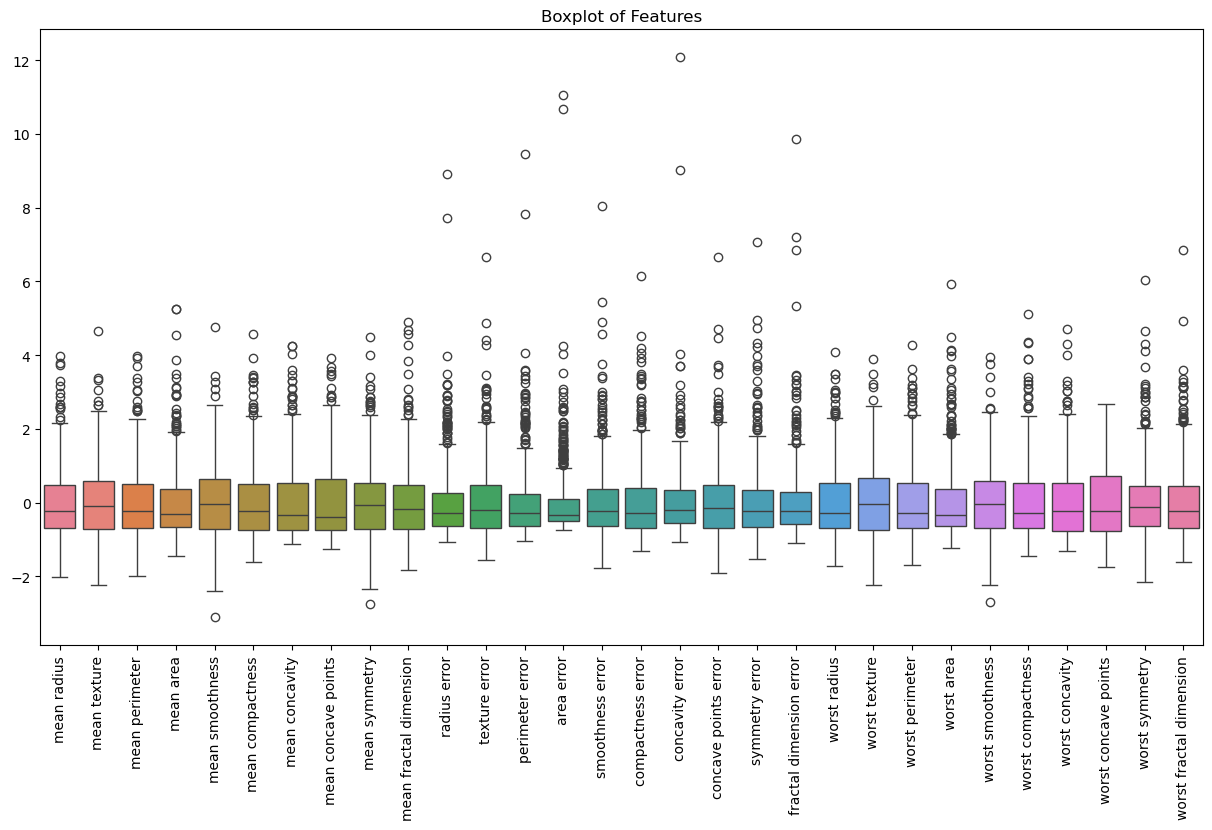

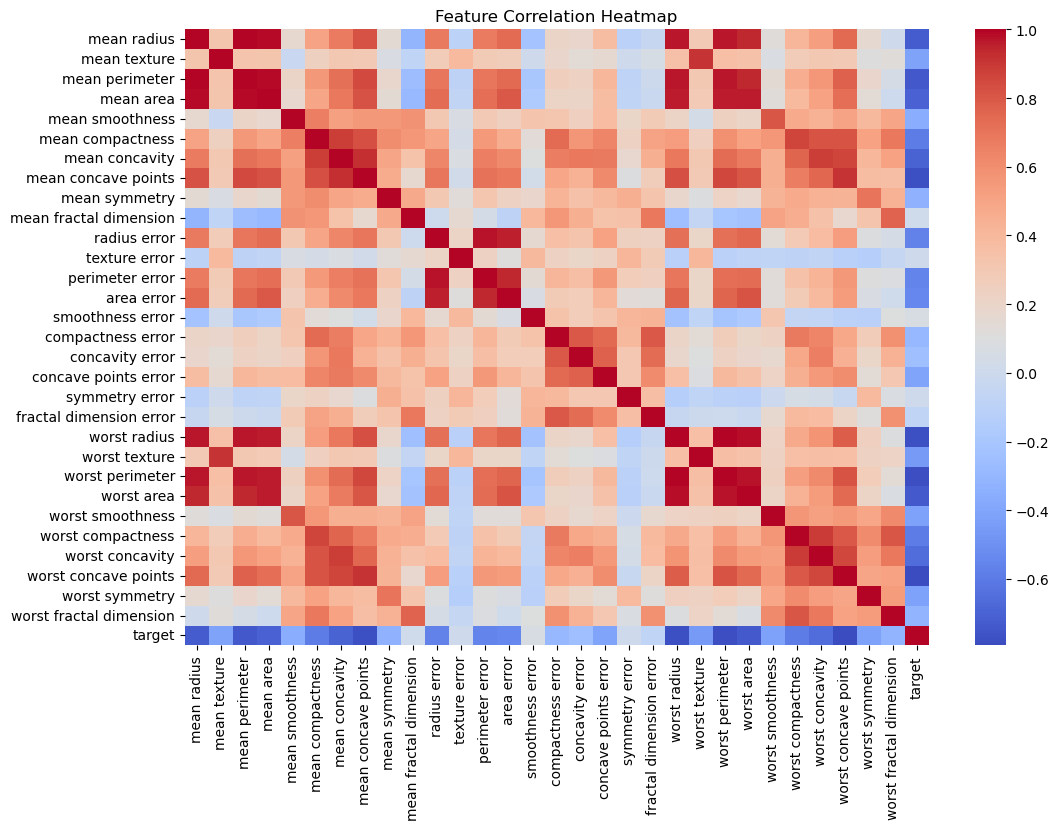

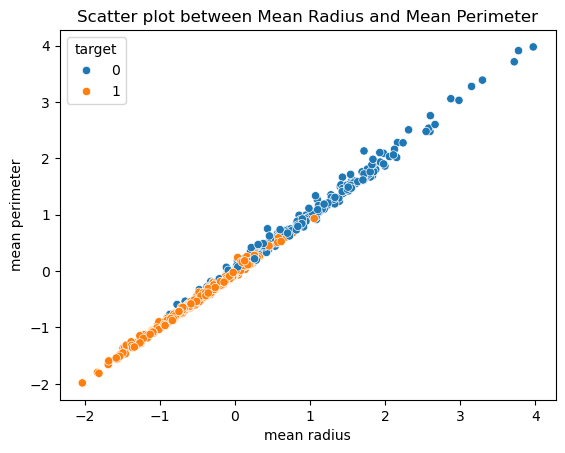

In [ ]:
# Histogram to check feature distributions
df_scaled.iloc[:, :-1].hist(figsize=(12, 12), bins=30)
plt.subplots_adjust(hspace=0.5, wspace=0.5)  # Increase the spacing between rows and columns
plt.suptitle("Feature Distributions after Scaling")
plt.show()

# Boxplot to detect outliers
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_scaled.iloc[:, :-1])
plt.xticks(rotation=90)
plt.title("Boxplot of Features")
plt.show()

# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_scaled.corr(), cmap='coolwarm', annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

# Scatter plot between two highly correlated features
sns.scatterplot(x=df_scaled["mean radius"], y=df_scaled["mean perimeter"], hue=df_scaled["target"])
plt.title("Scatter plot between Mean Radius and Mean Perimeter")
plt.show()



## Feature Selection

###  Using Correlation Analysis

In [16]:
# Find highly correlated features (Threshold: 0.9)
correlation_matrix = df_scaled.corr().abs()
upper_tri = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Select features with correlation > 0.9
high_correlation_features = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)]
print("Highly Correlated Features to Drop:", high_correlation_features)

# Drop highly correlated features
df_selected = df_scaled.drop(columns=high_correlation_features)


Highly Correlated Features to Drop: ['mean perimeter', 'mean area', 'mean concave points', 'perimeter error', 'area error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst concave points']


### Using SelectKBest (Chi-Square Test)

In [18]:
from sklearn.feature_selection import SelectKBest, f_classif

# Selecting the top 10 features
selector = SelectKBest(score_func=f_classif, k=10)
X_selected = selector.fit_transform(df_scaled.iloc[:, :-1], df_scaled['target'])

# Get selected feature names
selected_features = df_scaled.iloc[:, :-1].columns[selector.get_support()]
print("Top Selected Features:", selected_features)

Top Selected Features: Index(['mean radius', 'mean perimeter', 'mean area', 'mean concavity',
       'mean concave points', 'worst radius', 'worst perimeter', 'worst area',
       'worst concavity', 'worst concave points'],
      dtype='object')


### Using Recursive Feature Elimination (RFE)

In [20]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Use RandomForestClassifier for feature selection
model = RandomForestClassifier(n_estimators=100, random_state=42)
rfe = RFE(model, n_features_to_select=10)
rfe.fit(df_scaled.iloc[:, :-1], df_scaled['target'])

# Get selected feature names
rfe_selected_features = df_scaled.iloc[:, :-1].columns[rfe.support_]
print("RFE Selected Features:", rfe_selected_features)

RFE Selected Features: Index(['mean perimeter', 'mean area', 'mean concavity', 'mean concave points',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst concavity', 'worst concave points'],
      dtype='object')


### Dimensionality Reduction using PCA


Explained Variance by each PC: [0.44272026 0.18971182 0.09393163 0.06602135 0.05495768 0.04024522
 0.02250734 0.01588724 0.01389649 0.01168978]
Total Variance Explained: 0.9515688143366668


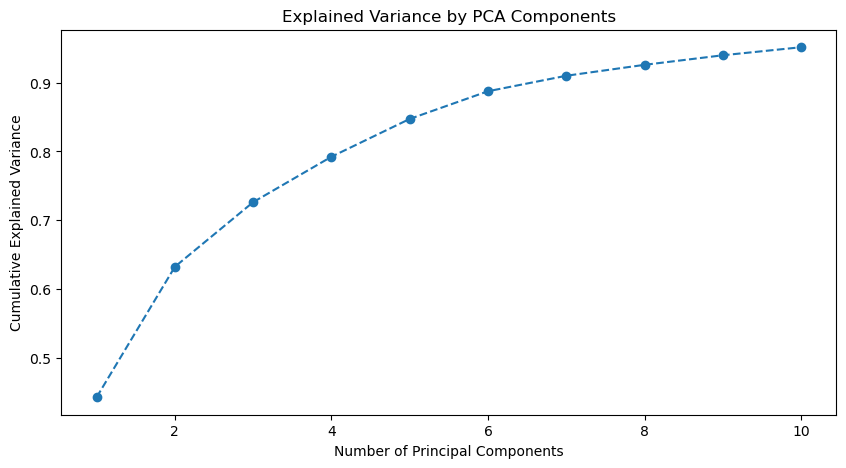

In [22]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=10)  # Keep top 10 principal components
X_pca = pca.fit_transform(df_scaled.iloc[:, :-1])

# Create a DataFrame with principal components
df_pca = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(10)])
df_pca['target'] = df_scaled['target']

# Explained Variance Ratio
print("Explained Variance by each PC:", pca.explained_variance_ratio_)
print("Total Variance Explained:", sum(pca.explained_variance_ratio_))

# Scree Plot (To visualize variance retained per PC)
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance by PCA Components")
plt.show()

In [89]:
df_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,target
0,9.192837,1.948583,-1.123166,-3.633731,1.195110,1.411424,2.159370,-0.398407,-0.157118,-0.877402,0
1,2.387802,-3.768172,-0.529293,-1.118264,-0.621775,0.028656,0.013358,0.240988,-0.711905,1.106995,0
2,5.733896,-1.075174,-0.551748,-0.912083,0.177086,0.541452,-0.668166,0.097374,0.024066,0.454275,0
3,7.122953,10.275589,-3.232790,-0.152547,2.960878,3.053422,1.429911,1.059565,-1.405440,-1.116975,0
4,3.935302,-1.948072,1.389767,-2.940639,-0.546747,-1.226495,-0.936213,0.636376,-0.263805,0.377704,0
...,...,...,...,...,...,...,...,...,...,...,...
564,6.439315,-3.576817,2.459487,-1.177314,0.074824,-2.375193,-0.596130,-0.035471,0.987929,0.256989,0
565,3.793382,-3.584048,2.088476,2.506028,0.510723,-0.246710,-0.716326,-1.113360,-0.105207,-0.108632,0
566,1.256179,-1.902297,0.562731,2.089227,-1.809991,-0.534447,-0.192758,0.341887,0.393917,0.520877,0
567,10.374794,1.672010,-1.877029,2.356031,0.033742,0.567936,0.223082,-0.280239,-0.542035,-0.089296,0


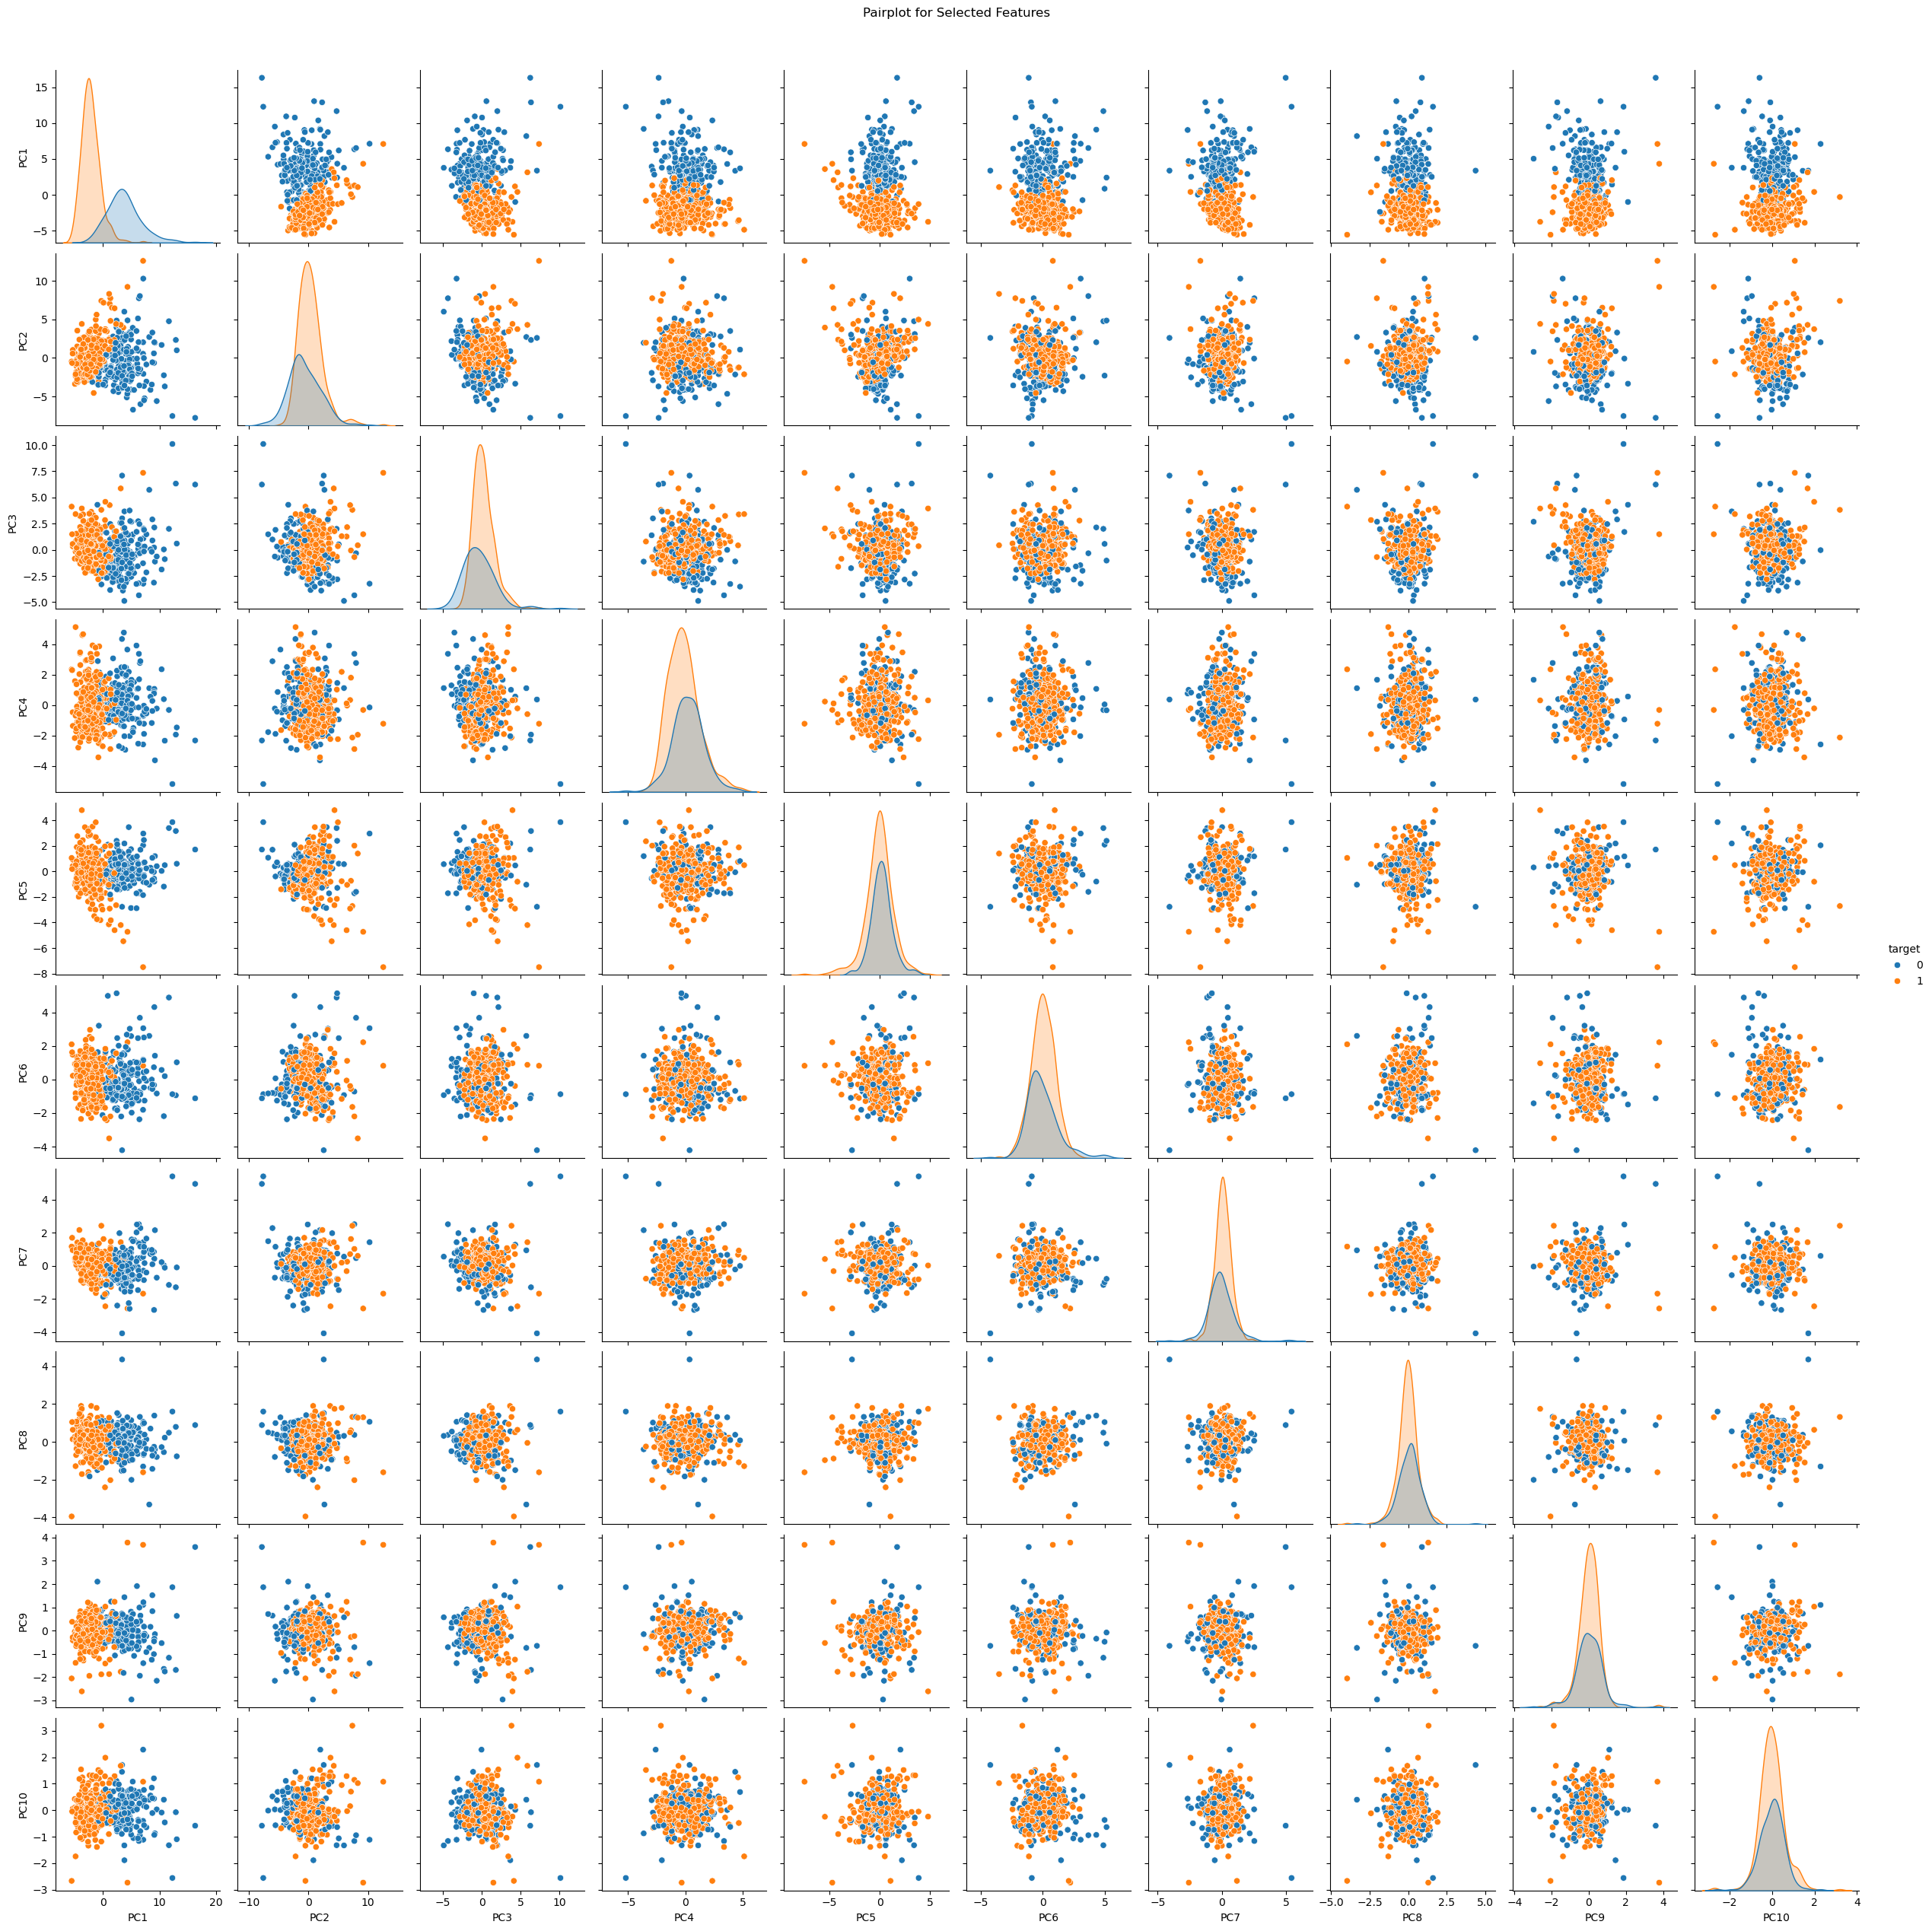

In [95]:
sns.pairplot(df_pca, hue="target", diag_kind="kde")
plt.suptitle("Pairplot for Selected Features", y=1.02)
plt.show()

Potential Risks
Loss of Information:

Omission of Useful Features: If the selection process inadvertently removes features that contain important information, the model might miss key signals.

Interactions: Some features might not be informative on their own but become valuable when combined with others. Removing them may lead to a loss of these interaction effects.

Overfitting to Training Data:

Selection Bias: If feature selection is performed only on the training set, you might end up with a set of features that works very well on the training data but fails to generalize.

Instability: The selected features might change dramatically with different splits of the data, indicating that the selection is not stable.

Data Leakage:

Inadvertent Inclusion of Test Information: If the feature selection process is not properly separated from the model evaluation (e.g., using the test set during selection), it can lead to overly optimistic performance estimates.

Strategies to Mitigate These Risks
Robust Cross-Validation:

Nested Cross-Validation: Use a nested cross-validation approach where feature selection is done inside the inner loop. This helps in assessing whether the selected features and the model generalize well to unseen data.

Repeated CV: Perform repeated cross-validation to check if the same features are consistently selected.

Incorporate Domain Knowledge:

Expert Input: Combine automated feature selection methods with expert knowledge to ensure that important predictors are not accidentally removed.

Feature Engineering: Rather than just removing features, consider transforming or combining them in ways that preserve or highlight important relationships.

Use Regularization Methods:

Regularization: Techniques like L1 (Lasso) or Elastic Net not only help with feature selection by shrinking coefficients of less important features but also reduce the risk of overfitting.

Ensemble Methods: Use ensemble methods (e.g., Random Forests or Gradient Boosting) that can handle a larger set of features and provide insights into feature importance without aggressive selection.

Stability Selection:

Stability Analysis: Evaluate the consistency of selected features across different subsamples or bootstrapped datasets. Stable features are more likely to be truly important.

Monitor Model Performance:

Comprehensive Metrics: Always validate the model using multiple metrics (e.g., precision, recall, AUC-ROC) to ensure that the reduced feature set does not adversely affect model performance.

Hold-Out Validation: Keep a completely independent validation set or test set to assess the final performance after feature selection and model training.



## Train-Test Split


In [26]:
from sklearn.model_selection import train_test_split

# Use PCA-transformed features or feature-selected dataset
X = df_pca.iloc[:, :-1]  # Using PCA-transformed data
y = df_pca['target']  # Target labels

# Train-Test Split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


## Train Different Classification Models

Logistic Regression

Support Vector Machine (SVM)

Random Forest

K-Nearest Neighbors (KNN)

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(kernel='linear'),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("-" * 50)


Model: Logistic Regression
Accuracy: 0.9649
Confusion Matrix:
 [[41  1]
 [ 3 69]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.95        42
           1       0.99      0.96      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114

--------------------------------------------------
Model: SVM
Accuracy: 0.9561
Confusion Matrix:
 [[41  1]
 [ 4 68]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94        42
           1       0.99      0.94      0.96        72

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114

--------------------------------------------------
Model: Random Forest
Accuracy: 0.9386
Confusion 

In [30]:
# Train and evaluate models with selected features
rfe_selected_features
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("-" * 50)


Model: Logistic Regression
Accuracy: 0.9649
Confusion Matrix:
 [[41  1]
 [ 3 69]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.95        42
           1       0.99      0.96      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114

--------------------------------------------------
Model: SVM
Accuracy: 0.9561
Confusion Matrix:
 [[41  1]
 [ 4 68]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94        42
           1       0.99      0.94      0.96        72

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114

--------------------------------------------------
Model: Random Forest
Accuracy: 0.9386
Confusion 

## Compare Model Performance Using Cross-Validation


In [32]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5)
    print(f"{name} - Average Accuracy: {np.mean(scores):.4f} (±{np.std(scores):.4f})")


Logistic Regression - Average Accuracy: 0.9789 (±0.0070)
SVM - Average Accuracy: 0.9772 (±0.0070)
Random Forest - Average Accuracy: 0.9508 (±0.0182)
KNN - Average Accuracy: 0.9613 (±0.0132)


## Hyperparameter Tuning with Grid Search & Randomised Search

### Tune Logistic Regression

In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define hyperparameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['liblinear', 'lbfgs']
}

# Perform Grid Search
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_logistic_params = grid_search.best_params_
C_value = best_logistic_params.get('C', 1.0)  # Default to 1.0 if not found
solver_value = best_logistic_params.get('solver', 'lbfgs')  # Default to 'lbfgs'

best_logistic = LogisticRegression(C=C_value, solver=solver_value)

# Best parameters
print("Best Logistic Regression Parameters:", grid_search.best_params_)
print("Best Logistic Regression Accuracy:", grid_search.best_score_)


Best Logistic Regression Parameters: {'C': 0.1, 'solver': 'lbfgs'}
Best Logistic Regression Accuracy: 0.9824175824175825


### Tune Support Vector Machine (SVM)

In [37]:
from sklearn.svm import SVC

# Define hyperparameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularisation parameter
    'kernel': ['linear', 'rbf'],  # Type of SVM kernel
    'gamma': ['scale', 'auto']  # Kernel coefficient for 'rbf' kernel
}

grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_svm_params = grid_search.best_params_
C_svm = best_svm_params.get('C', 1.0)
kernel_svm = best_svm_params.get('kernel', 'rbf')

best_svm = SVC(C=C_svm, kernel=kernel_svm, probability=True)

print("Best SVM Parameters:", grid_search.best_params_)
print("Best SVM Accuracy:", grid_search.best_score_)


Best SVM Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Best SVM Accuracy: 0.9758241758241759


###  Tune Random Forest Classifier (Using Randomised Search)

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Define hyperparameter grid
param_dist = {
    'n_estimators': [50, 100, 200, 300],  # Number of trees
    'max_depth': [None, 10, 20, 30],  # Maximum depth of tree
    'min_samples_split': [2, 5, 10],  # Minimum samples to split
    'min_samples_leaf': [1, 2, 4],  # Minimum samples per leaf
    'bootstrap': [True, False],  # Bootstrap samples
    'class_weight': ['balanced']
}

random_search = RandomizedSearchCV(RandomForestClassifier(), param_dist, n_iter=20, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)

best_rf = RandomForestClassifier(**random_search.best_params_)

print("Best Random Forest Parameters:", random_search.best_params_)
print("Best Random Forest Accuracy:", random_search.best_score_)


Best Random Forest Parameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': None, 'class_weight': 'balanced', 'bootstrap': True}
Best Random Forest Accuracy: 0.9604395604395604


### Tune K-Nearest Neighbors (KNN)

In [41]:
from sklearn.neighbors import KNeighborsClassifier

# Define hyperparameter grid
param_grid = {
    'n_neighbors': list(range(1, 20)),  # Number of neighbors
    'weights': ['uniform', 'distance'],  # Weight function
    'metric': ['euclidean', 'manhattan']  # Distance metric
}

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_knn = KNeighborsClassifier(**grid_search.best_params_)

print("Best KNN Parameters:", grid_search.best_params_)
print("Best KNN Accuracy:", grid_search.best_score_)


Best KNN Parameters: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
Best KNN Accuracy: 0.9736263736263737


## Compare Model Performance

In [43]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Dictionary of best models from Grid/Random Search
best_models = {
    "Logistic Regression": best_logistic,
    "SVM": best_svm,
    "Random Forest": best_rf,
    "KNN": best_knn
}

# Evaluate each model
for name, model in best_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("-" * 50)


Model: Logistic Regression
Accuracy: 0.9737
Confusion Matrix:
 [[40  2]
 [ 1 71]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96        42
           1       0.97      0.99      0.98        72

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

--------------------------------------------------
Model: SVM
Accuracy: 0.9825
Confusion Matrix:
 [[41  1]
 [ 1 71]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

--------------------------------------------------
Model: Random Forest
Accuracy: 0.9474
Confusion 

The model with the highest accuracy and best precision/recall balance will be chosen.

Random Forest is often the best choice for complex datasets.

SVM works well with PCA-reduced datasets.

If data is linearly separable, Logistic Regression is sufficient.

If you need a simple, explainable model, go for Logistic Regression.

## Ensemble Learning (Boosting & Bagging)


## Random Forest (Bagging)
### Bagging reduces variance by averaging multiple models trained on different data subsets.

In [47]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
rf = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)

# Evaluate
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.9298245614035088
              precision    recall  f1-score   support

           0       0.89      0.93      0.91        42
           1       0.96      0.93      0.94        72

    accuracy                           0.93       114
   macro avg       0.92      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114



## Gradient Boosting (Boosting)
### Boosting corrects weak learners by training models sequentially.

In [49]:
from sklearn.ensemble import GradientBoostingClassifier

# Train Gradient Boosting
gbc = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42)
gbc.fit(X_train, y_train)

# Predictions
y_pred_gbc = gbc.predict(X_test)

# Evaluate
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gbc))
print(classification_report(y_test, y_pred_gbc))


Gradient Boosting Accuracy: 0.9298245614035088
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        42
           1       0.94      0.94      0.94        72

    accuracy                           0.93       114
   macro avg       0.92      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114



In [50]:
models = {
    "Random Forest": rf,
    "Gradient Boosting": gbc,
    "Logistic Regression": best_logistic,
    "SVM": best_svm,
    "Best Random Forest": best_rf,
    "KNN": best_knn
}

for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"{name} Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(classification_report(y_test, y_pred_gbc))


Random Forest Accuracy: 0.9298
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        42
           1       0.94      0.94      0.94        72

    accuracy                           0.93       114
   macro avg       0.92      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114

Gradient Boosting Accuracy: 0.9298
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        42
           1       0.94      0.94      0.94        72

    accuracy                           0.93       114
   macro avg       0.92      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114

Logistic Regression Accuracy: 0.9737
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        42
           1       0.94      0.94      0.94        72

    accuracy                           0.93       114
   macro avg       0.92  

In [51]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

def evaluate_model(model, X_test, y_test, name):
    y_pred = model.predict(X_test)
    
    # Classification report
    report = classification_report(y_test, y_pred, target_names=["Benign", "Malignant"])
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # AUC-ROC Score
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    
    print(f"\n🏆 {name} Evaluation:")
    print(report)
    print("AUC-ROC Score:", roc_auc)

# Apply to all models
for name, model in models.items():
    evaluate_model(model, X_test, y_test, name)


🏆 Random Forest Evaluation:
              precision    recall  f1-score   support

      Benign       0.89      0.93      0.91        42
   Malignant       0.96      0.93      0.94        72

    accuracy                           0.93       114
   macro avg       0.92      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114

AUC-ROC Score: 0.9882605820105821

🏆 Gradient Boosting Evaluation:
              precision    recall  f1-score   support

      Benign       0.90      0.90      0.90        42
   Malignant       0.94      0.94      0.94        72

    accuracy                           0.93       114
   macro avg       0.92      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114

AUC-ROC Score: 0.9861111111111112

🏆 Logistic Regression Evaluation:
              precision    recall  f1-score   support

      Benign       0.98      0.95      0.96        42
   Malignant       0.97      0.99      0.98        72

    accuracy     

The AUC-ROC Score (Area Under the Receiver Operating Characteristic Curve) is a performance metric for binary classification models that measures the model's ability to distinguish between classes. Here's how you can interpret it:

Range of Values:

The score ranges from 0.5 to 1.0.

0.5 means the model is performing no better than random guessing.

1.0 indicates perfect discrimination between the classes.

Interpreting Specific Values:

0.5–0.6: Poor performance; the model has low discrimination power.

0.6–0.7: Fair performance; the model shows some ability to distinguish between classes, but there's room for improvement.

0.7–0.8: Good performance; the model reliably differentiates between classes.

0.8–0.9: Very good performance; the model is highly accurate in distinguishing classes.

Above 0.9: Excellent performance; the model is nearly perfect at classification, though caution is needed to ensure it's not overfitting.

ROC Curve Context:

The ROC Curve plots the True Positive Rate (Recall) against the False Positive Rate at various threshold settings.

The AUC summarizes the entire ROC curve into a single value, representing the likelihood that the model will rank a randomly chosen positive instance higher than a randomly chosen negative one.

Why It’s Useful in Medical Research:

Sensitivity: In medical contexts, high recall (or sensitivity) is critical because missing a positive case (e.g., a malignant tumor) can have serious consequences.

Balanced Evaluation: The AUC-ROC score gives an overall picture of performance across different thresholds, helping you choose a balance between sensitivity (recall) and specificity.

In summary, a higher AUC-ROC indicates that your model is better at distinguishing between patients with and without the condition, which is particularly important in medical research where false negatives can be critical.

How Thresholds Affect the Confusion Matrix
Default Threshold (0.5):
Most models use 0.5 as the default cutoff. If the predicted probability is greater than or equal to 0.5, the model classifies the instance as positive; otherwise, it’s classified as negative.

Adjusting the Threshold:

Lowering the threshold (e.g., to 0.3):

More instances are classified as positive.

Recall increases because fewer true positives are missed.

However, precision might decrease because more false positives occur.

Raising the threshold (e.g., to 0.7):

Fewer instances are classified as positive.

Precision increases because only the most confident predictions are considered positive.

Recall decreases since some true positives might now be classified as negative.

Why This Matters in Practice
In fields like medical research, where missing a true positive (i.e., a false negative) can have serious consequences, you might choose a lower threshold to maximize recall. However, this could lead to more false alarms, so you must balance the trade-off depending on the cost of false positives versus false negatives.

Confusion Matrix with Threshold 0.3:
 [[39  3]
 [ 1 71]]


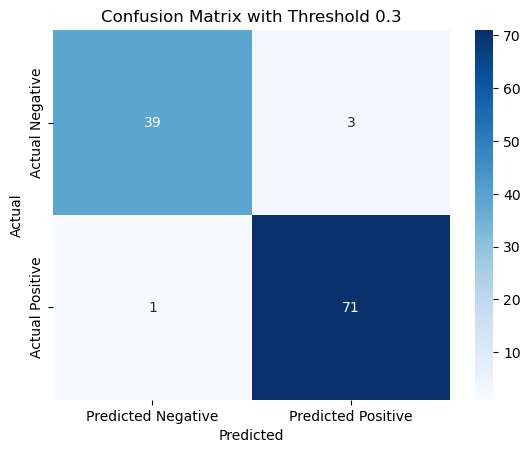

              precision    recall  f1-score   support

    Negative       0.97      0.93      0.95        42
    Positive       0.96      0.99      0.97        72

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [54]:
import seaborn as sns

# Assume best_svm is trained after GridSearchCV and has probability=True
best_svm.fit(X_train, y_train)

# Get predicted probabilities for the positive class
y_probs = best_svm.predict_proba(X_test)[:, 1]

# Define a new threshold, e.g., 0.3 instead of the default 0.5
threshold = 0.3
y_pred_adjusted = np.where(y_probs > threshold, 1, 0)

# Evaluate the predictions with the adjusted threshold
cm_adjusted = confusion_matrix(y_test, y_pred_adjusted)
print("Confusion Matrix with Threshold 0.3:\n", cm_adjusted)

# Visualize the confusion matrix
sns.heatmap(cm_adjusted, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Predicted Negative", "Predicted Positive"],
            yticklabels=["Actual Negative", "Actual Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix with Threshold 0.3")
plt.show()

# Print classification report to see metrics including recall and precision
print(classification_report(y_test, y_pred_adjusted, target_names=["Negative", "Positive"]))



How Threshold Adjustment Works
Lowering the Threshold (e.g., to 0.3):
More instances are classified as positive.

Recall increases: Fewer true positives are missed.

Precision may decrease: More false positives may occur.

Raising the Threshold (e.g., above 0.5):
Fewer instances are classified as positive.

Precision increases: Only the most confident predictions are labeled positive.

Recall may decrease: Some true positives may be misclassified as negative.

In medical research, where missing a positive case could have severe consequences, you might prefer a lower threshold to maximize recall—even if that comes at the cost of lower precision. Adjust the threshold based on your application's needs and carefully evaluate the confusion matrix and other metrics.